<a href="https://colab.research.google.com/github/evertonEm/numero-secreto/blob/main/analise_hoteis_Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/hoteis.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Estrelas            1000 non-null   int64  
 1   ProximidadeTurismo  1000 non-null   float64
 2   Capacidade          1000 non-null   int64  
 3   Preco               1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


In [ ]:
df.head()

,Estrelas,ProximidadeTurismo,Capacidade,Preco
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087


In [ ]:
corr = df.corr()
corr['Preco']

,Preco
Estrelas,0.401099
ProximidadeTurismo,-0.697142
Capacidade,0.531866
Preco,1.000000


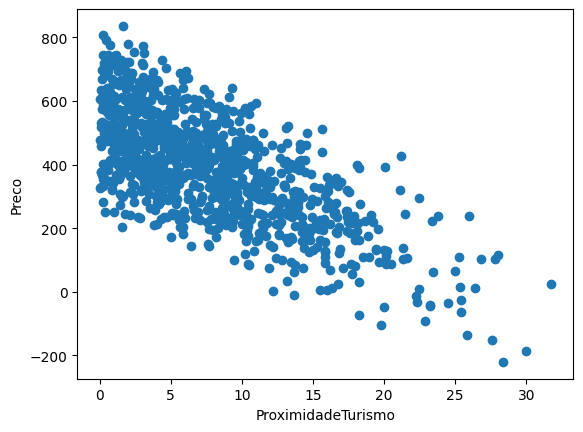

In [ ]:
plt.scatter(df['ProximidadeTurismo'], df['Preco'])
plt.xlabel('ProximidadeTurismo')
plt.ylabel('Preco')
plt.show()

## Passo 1: Análise com o PairPlot

In [ ]:
import seaborn as sns

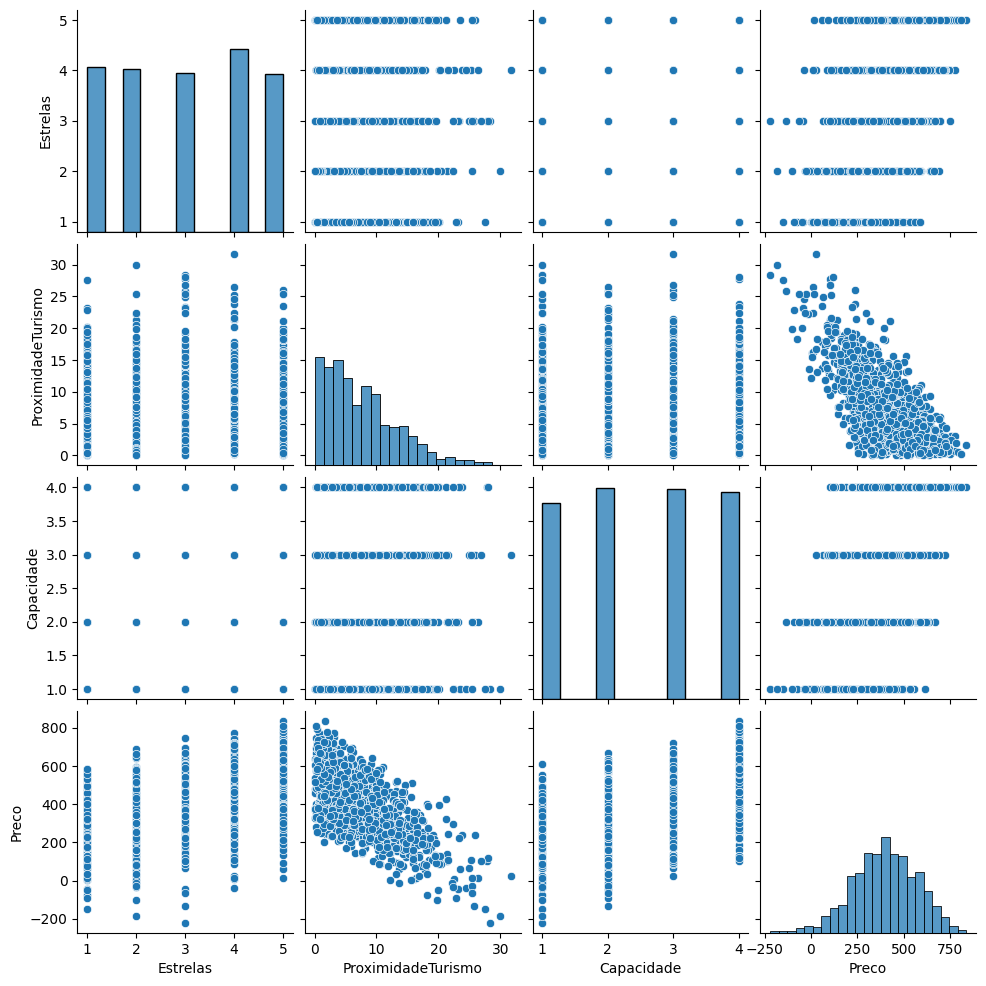

In [ ]:
sns.pairplot(df)

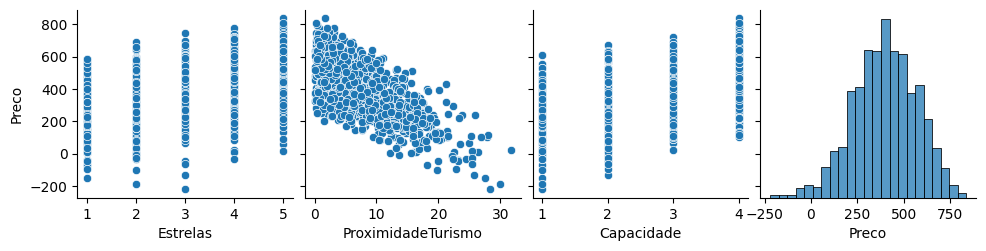

In [ ]:
sns.pairplot(df, y_vars = 'Preco')

## Passo 2: Construção dos Modelos de Regressão Linear

In [ ]:
import statsmodels.api as sm

In [ ]:
# Modelo 1: Utilizando apenas 'Estrelas'
X1 = df[['Estrelas']]
X1 = sm.add_constant(X1)  # Adicionando a constante
y = df['Preco']
modelo_1 = sm.OLS(y, X1).fit()

# Modelo 2: Utilizando 'Estrelas' e 'ProximidadeTurismo'
X2 = df[['Estrelas', 'ProximidadeTurismo']]
X2 = sm.add_constant(X2)
modelo_2 = sm.OLS(y, X2).fit()

# Modelo 3: Utilizando 'Estrelas', 'ProximidadeTurismo' e 'Capacidade'
X3 = df[['Estrelas', 'ProximidadeTurismo', 'Capacidade']]
X3 = sm.add_constant(X3)
modelo_3 = sm.OLS(y, X3).fit()

## Passo 3: Comparação dos Modelos

In [ ]:
print("Modelo 1 - Apenas 'Estrelas':")
print(modelo_1.summary())
print("\nModelo 2 - 'Estrelas' e 'ProximidadeTurismo':")
print(modelo_2.summary())
print("\nModelo 3 - 'Estrelas', 'ProximidadeTurismo' e 'Capacidade':")
print(modelo_3.summary())

Modelo 1 - Apenas 'Estrelas':
                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     191.3
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           6.09e-40
Time:                        04:22:09   Log-Likelihood:                -6476.7
No. Observations:                1000   AIC:                         1.296e+04
Df Residuals:                     998   BIC:                         1.297e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.3517 

In [ ]:
print('Modelo 1 :', modelo_1.rsquared)
print('Modelo 2 :', modelo_2.rsquared)
print('Modelo 3 :', modelo_3.rsquared)

Modelo 1 : 0.16088060910369262
Modelo 2 : 0.6498344879892148
Modelo 3 : 0.9230202753377601


In [ ]:
modelo_3.params

,0
const,192.844250
Estrelas,50.874974
ProximidadeTurismo,-20.046232
Capacidade,81.026781


In [ ]:
modelo_3.resid

,0
0,2.437322
1,-42.582163
2,-2.748272
3,-34.424505
4,-35.473539
...,...
995,-8.371493
996,-58.616129
997,-2.253675
998,82.416284


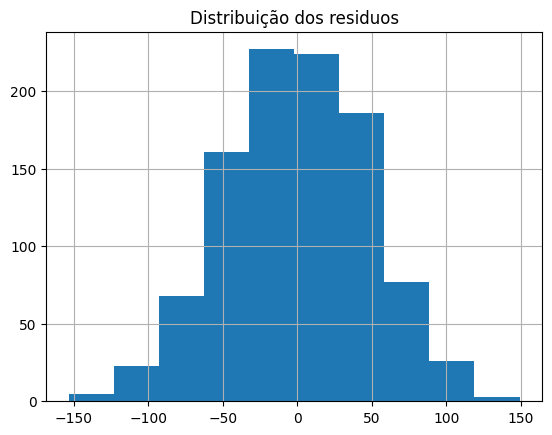

In [ ]:
modelo_3.resid.hist()
plt.title("Distribuição dos residuos")
plt.show()